# 02. PyTorch Neural Network Classification

In [1]:
from sklearn.datasets import make_circles
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Device Setup
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
print(f"Using device: {device}, with torch version: {torch.__version__}")

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 labels of y:\n{y[:5]}")

helper_functions.py already exists, skipping download
Using device: mps, with torch version: 2.9.0
First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 labels of y:
[1 1 1 1 0]


In [2]:
# Make DataFrames of the circles data
import pandas as pd

circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


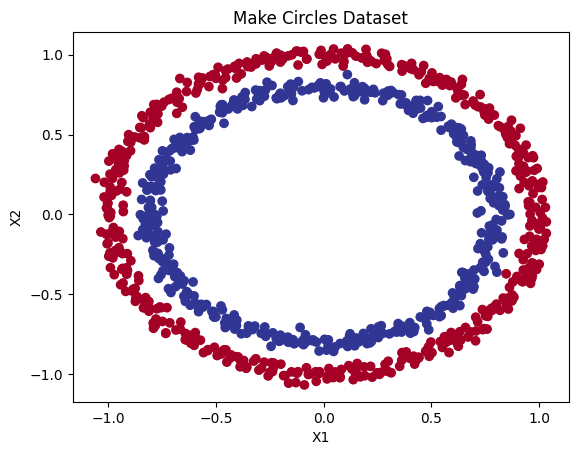

In [3]:
# Visualize with a scatter plot
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Make Circles Dataset")
plt.show()

In [4]:
print(f"{X.shape=}, {y.shape=}")
X, y = torch.tensor(X).type(torch.float).to(device), torch.tensor(y).type(torch.float).to(device)

print(f"{X[:5]=}, \n{y[:5]=}")

X.shape=(1000, 2), y.shape=(1000,)
X[:5]=tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]], device='mps:0'), 
y[:5]=tensor([1., 1., 1., 1., 0.], device='mps:0')


In [5]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"{X_train.shape=}, {X_test.shape=}, {y_train.shape=}, {y_test.shape=}")

X_train.shape=torch.Size([800, 2]), X_test.shape=torch.Size([200, 2]), y_train.shape=torch.Size([800]), y_test.shape=torch.Size([200])


## Building a model

In [6]:
class CircleModelV0(nn.Module):
    # Initialize the model
    def __init__(self):
        super().__init__()
        # 2 layers, 
        # layer 1: input 2 features, output 5 features
        # layer 2: input 5 features, output 1 feature
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.LeakyReLU()
    
    # Pass through all layers
    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        return x
    
# Creating an instance of the model
model_0 = CircleModelV0().to(device)
print(model_0)
print(f"Number of parameters in model: {sum(p.numel() for p in model_0.parameters())}")
# print(f"{model_0.state_dict()=}")

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)
Number of parameters in model: 337


In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

Epoch: 0 | Train Loss: 0.69446 | Train Acc: 50.75000 | Test Loss: 0.71095 | Test Acc: 50.00000
Epoch: 20 | Train Loss: 0.28505 | Train Acc: 92.25000 | Test Loss: 0.28755 | Test Acc: 91.00000
Epoch: 40 | Train Loss: 0.02262 | Train Acc: 99.75000 | Test Loss: 0.02941 | Test Acc: 100.00000
Epoch: 60 | Train Loss: 0.00410 | Train Acc: 100.00000 | Test Loss: 0.00911 | Test Acc: 100.00000
Epoch: 80 | Train Loss: 0.00195 | Train Acc: 100.00000 | Test Loss: 0.00719 | Test Acc: 100.00000
Epoch: 100 | Train Loss: 0.00141 | Train Acc: 100.00000 | Test Loss: 0.00580 | Test Acc: 100.00000
Epoch: 120 | Train Loss: 0.00111 | Train Acc: 100.00000 | Test Loss: 0.00508 | Test Acc: 100.00000
Epoch: 140 | Train Loss: 0.00090 | Train Acc: 100.00000 | Test Loss: 0.00452 | Test Acc: 100.00000
Epoch: 160 | Train Loss: 0.00075 | Train Acc: 100.00000 | Test Loss: 0.00409 | Test Acc: 100.00000
Epoch: 180 | Train Loss: 0.00064 | Train Acc: 100.00000 | Test Loss: 0.00371 | Test Acc: 100.00000
Epoch: 200 | Train Lo

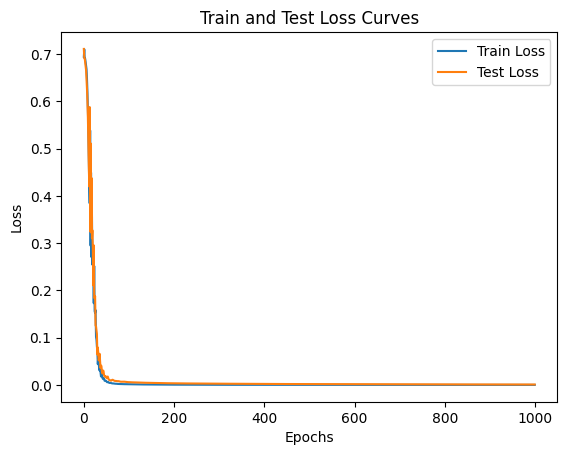

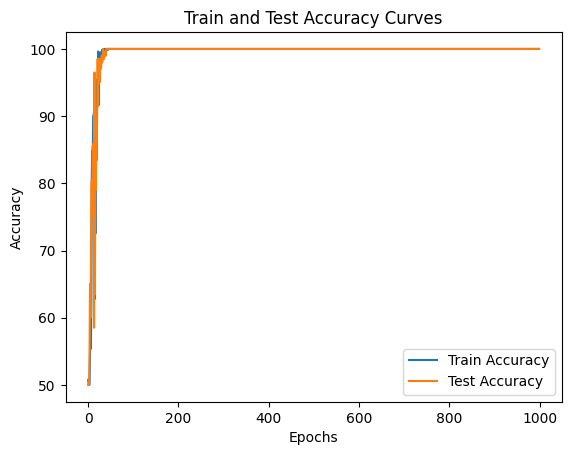

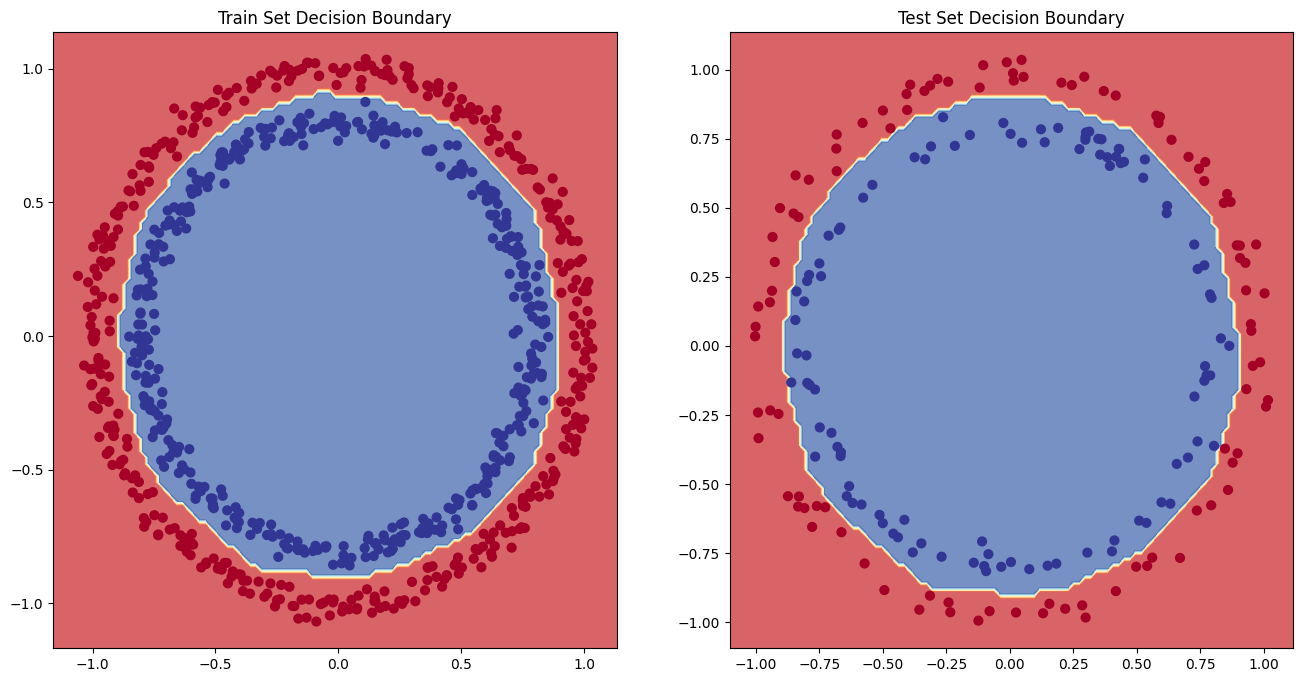

In [8]:
# Train/Test Loop
torch.manual_seed(42)
epochs = 1000

# Init empty lists to store loss values
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epochs_list = []

for epoch in range(epochs):
    # 0. Set model to train mode
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()  # Squeeze to remove extra dimensions
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits to prediction probabilities

    # 2. Calculate loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Update weights
    optimizer.step()

    # Set model to eval mode
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Every 20 epochs, calculate and print out test loss
    if epoch % 20 == 0:    
        # Print out what's happening
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")

#     # Append loss values to lists
    train_loss_values.append(loss.cpu().item())
    train_acc_values.append(acc)
    test_loss_values.append(test_loss.cpu().item())
    test_acc_values.append(test_acc)
    epochs_list.append(epoch)

# # Plot the loss curves
plt.plot(epochs_list, train_loss_values, label="Train Loss")
plt.plot(epochs_list, test_loss_values, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Test Loss Curves")
plt.legend()
plt.show()

# # plot the accuracy curves
plt.plot(epochs_list, train_acc_values, label="Train Accuracy")
plt.plot(epochs_list, test_acc_values, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy Curves")
plt.legend()
plt.show()

# Plot decidion boundary
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Train Set Decision Boundary")
plot_decision_boundary(model_0, X_train.cpu(), y_train.cpu())
plt.subplot(1, 2, 2)
plt.title("Test Set Decision Boundary")
plot_decision_boundary(model_0, X_test.cpu(), y_test.cpu())
plt.show()

In [9]:
# Save the model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_classification_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

## Exercise

### 1. Make Moons

X[:5]=array([[-0.14176498,  0.55823629],
       [ 1.19796627, -0.30399544],
       [ 0.759391  ,  0.1102501 ],
       [ 0.02331452, -0.60356298],
       [-0.80797972,  0.54846574]]), y[:5]=array([1, 1, 1, 1, 0])


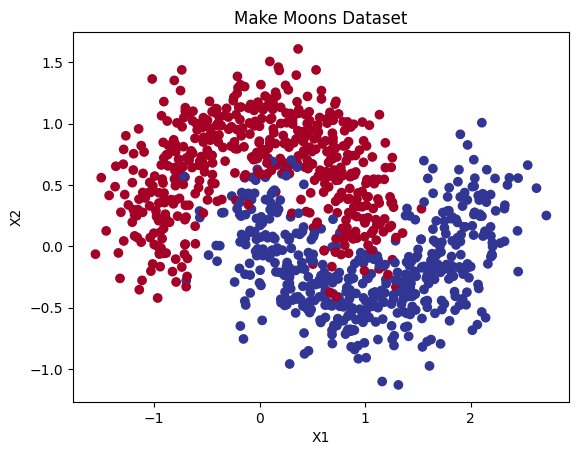

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)

print(f"{X[:5]=}, {y[:5]=}")

# Visualize with a scatter plot
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Make Moons Dataset")
plt.show()

In [11]:
import pandas as pd

moons = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
moons.head(10)

,X1,X2,label
0,-0.141765,0.558236,1
1,1.197966,-0.303995,1
2,0.759391,0.110250,1
3,0.023315,-0.603563,1
4,-0.807980,0.548466,0
5,0.686912,-0.005349,1
6,0.268517,-0.184217,1
7,-0.145282,0.565328,1
8,1.556445,-0.351400,1
9,0.791164,1.014105,0


In [12]:
moons.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [13]:
import torch
from torch import nn
from torch import optim
from sklearn.model_selection import train_test_split

X = torch.tensor(X).type(torch.float).to(device)
y = torch.tensor(y).type(torch.float).to(device)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"{X_train.shape=}, {X_test.shape=}, {y_train.shape=}, {y_test.shape=}")

X_train.shape=torch.Size([800, 2]), X_test.shape=torch.Size([200, 2]), y_train.shape=torch.Size([800]), y_test.shape=torch.Size([200])


In [14]:
# Create a model for moons dataset
class MoonsModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features=1)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.activation(x)
        x = self.layer_2(x)
        x = self.activation(x)
        x = self.layer_3(x)
        return x
    
moons_model = MoonsModel().to(device)
print(moons_model)

print(f"Number of parameters in model: {sum(p.numel() for p in moons_model.parameters())}")

MoonsModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=1, bias=True)
  (activation): Tanh()
)
Number of parameters in model: 625


In [15]:
# Loss function and optimizer setup
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=moons_model.parameters(), lr=0.001)

Epoch: 0 | Train Loss: 0.74090 | Train Acc: 34.62500 | Test Loss: 0.72861 | Test Acc: 41.50000
Epoch: 25 | Train Loss: 0.58718 | Train Acc: 81.75000 | Test Loss: 0.59122 | Test Acc: 78.00000
Epoch: 50 | Train Loss: 0.47364 | Train Acc: 81.50000 | Test Loss: 0.48993 | Test Acc: 77.50000
Epoch: 75 | Train Loss: 0.40277 | Train Acc: 82.75000 | Test Loss: 0.42502 | Test Acc: 79.50000
Epoch: 100 | Train Loss: 0.36412 | Train Acc: 84.12500 | Test Loss: 0.38553 | Test Acc: 80.00000
Epoch: 125 | Train Loss: 0.34040 | Train Acc: 85.25000 | Test Loss: 0.35830 | Test Acc: 81.00000
Epoch: 150 | Train Loss: 0.32621 | Train Acc: 86.25000 | Test Loss: 0.34041 | Test Acc: 82.00000
Epoch: 175 | Train Loss: 0.31889 | Train Acc: 86.37500 | Test Loss: 0.33012 | Test Acc: 83.50000
Epoch: 200 | Train Loss: 0.31544 | Train Acc: 86.37500 | Test Loss: 0.32466 | Test Acc: 84.00000
Epoch: 225 | Train Loss: 0.31361 | Train Acc: 86.50000 | Test Loss: 0.32154 | Test Acc: 84.00000
Epoch: 250 | Train Loss: 0.31225 | 

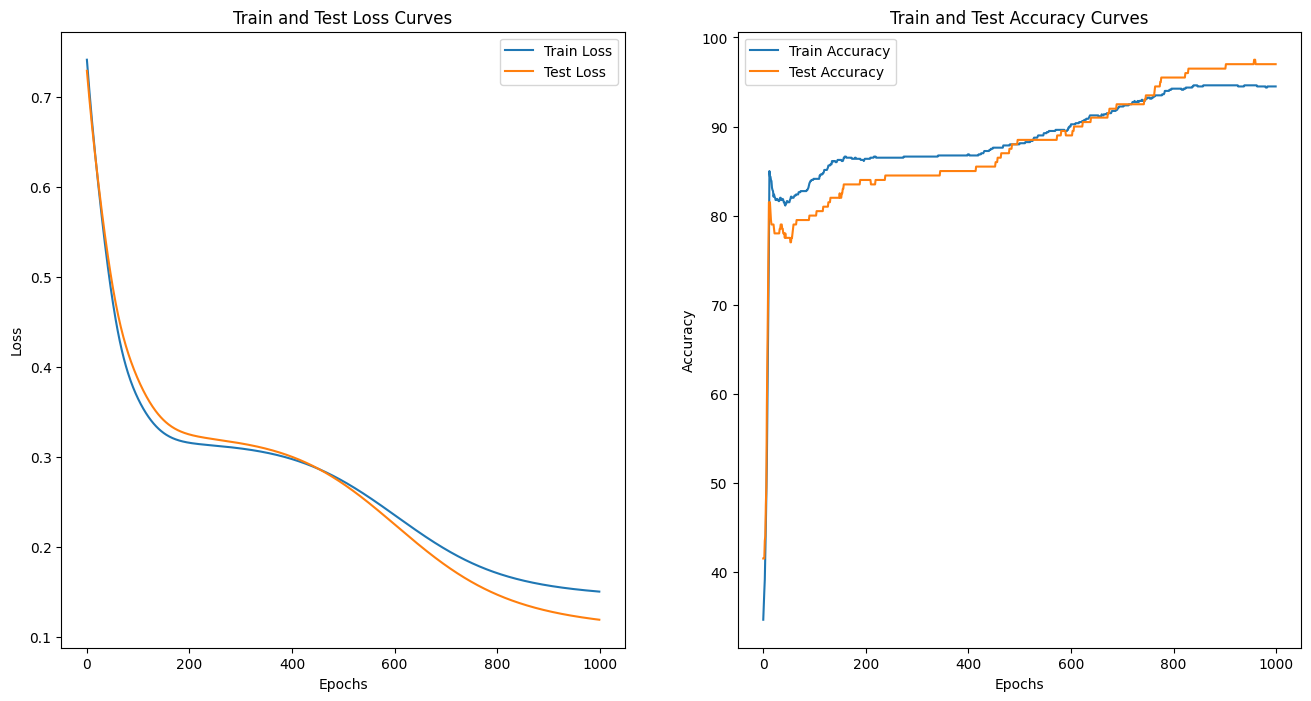

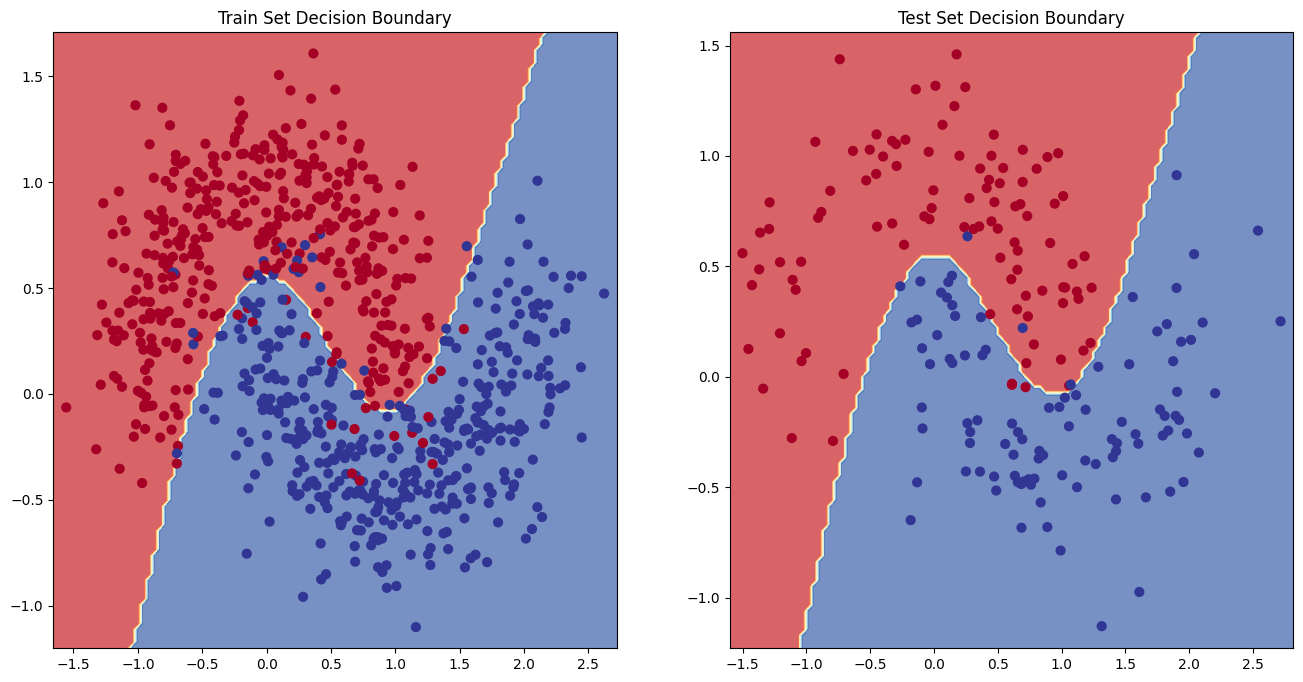

In [16]:
# Train/Test Loop
torch.manual_seed(42)
epochs = 1000

# Init empty lists to store loss values
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epochs_list = []

for epoch in range(epochs):
    # 0. Set model to train mode
    moons_model.train()

    # 1. Make the Forward Pass
    y_logits = moons_model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss (BCEWithLogitsLoss, so it will expect logits)
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step step step
    optimizer.step()

    # Test loop
    moons_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = moons_model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        # Every few epochs, print stuff
        if epoch % 25 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")
        
        # Append loss values to lists
        train_loss_values.append(loss.cpu().item())
        train_acc_values.append(acc)
        test_loss_values.append(test_loss.cpu().item())
        test_acc_values.append(test_acc)
        epochs_list.append(epoch)

# # Plot the loss curves
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_list, train_loss_values, label="Train Loss")
plt.plot(epochs_list, test_loss_values, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Test Loss Curves")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_list, train_acc_values, label="Train Accuracy")
plt.plot(epochs_list, test_acc_values, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy Curves")
plt.legend()

plt.show()

# Plot decidion boundary
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Train Set Decision Boundary")
plot_decision_boundary(moons_model, X_train.cpu(), y_train.cpu())

plt.subplot(1, 2, 2)
plt.title("Test Set Decision Boundary")
plot_decision_boundary(moons_model, X_test.cpu(), y_test.cpu())
plt.show()

## Multi-class Classification

X_blob[:5]=tensor([[-2.6032, 10.4470],
        [ 1.2812,  8.2180],
        [ 1.1550,  4.6042],
        [-8.3283, -7.6880],
        [-6.0456, -7.7670]], device='mps:0'), y_blob[:5]=tensor([0, 0, 4, 2, 2], device='mps:0')
X_blob_train.shape=torch.Size([4000, 2]), X_blob_test.shape=torch.Size([1000, 2]), y_blob_train.shape=torch.Size([4000]), y_blob_test.shape=torch.Size([1000])


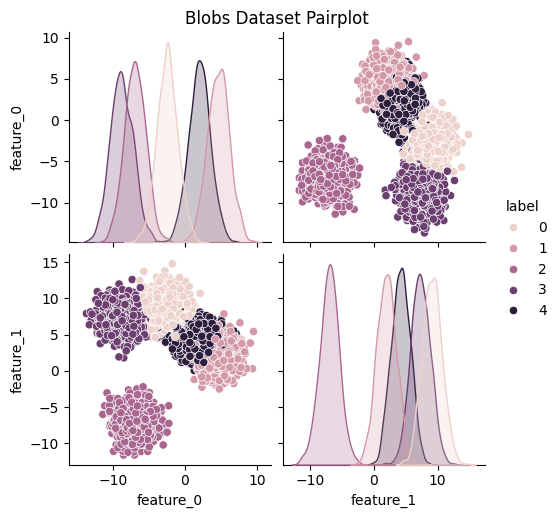

In [17]:
import torch
from torch import nn, optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set parameters
NUM_CLASSES = 5
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create blobs dataset
X_blob, y_blob = make_blobs(n_samples=5000, 
                  n_features=NUM_FEATURES,
                  centers=NUM_CLASSES,
                  cluster_std=1.5,
                  random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.tensor(X_blob).type(torch.float).to(device)
y_blob = torch.tensor(y_blob).type(torch.long).to(device)
print(f"{X_blob[:5]=}, {y_blob[:5]=}")

# Train/test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)
print(f"{X_blob_train.shape=}, {X_blob_test.shape=}, {y_blob_train.shape=}, {y_blob_test.shape=}")

# Plot data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

blob_df = pd.DataFrame(X_blob.cpu().numpy(), columns=[f"feature_{i}" for i in range(NUM_FEATURES)])
blob_df["label"] = y_blob.cpu().numpy()
sns.pairplot(blob_df, hue="label", diag_kind="kde")
plt.suptitle("Blobs Dataset Pairplot", y=1.02)
plt.show()

In [18]:
class BlobsModelV0(nn.Module):
    def __init__(self, input_features, output_features):
        """Initialises multi-class classification model.
        Args:
            input_features (int): Number of input features to the model.
            output_features (int): Number of output features (classes) of the model.
        
        Example:
            >>> model = BlobsModelV0(input_features=2, output_features=5)
        """
        super().__init__()
        # self.layer_1 = nn.Linear(in_features=input_features, out_features=16)
        # self.layer_2 = nn.Linear(in_features=16, out_features=32)
        # self.layer_3 = nn.Linear(in_features=32, out_features=16)
        # self.layer_4 = nn.Linear(in_features=16, out_features=output_features)
        # self.activation = nn.LeakyReLU()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=16),
            nn.LeakyReLU(),
            nn.Linear(in_features=16, out_features=32),
            nn.LeakyReLU(),
            nn.Linear(in_features=32, out_features=16),
            nn.LeakyReLU(),
            nn.Linear(in_features=16, out_features=output_features)
        )

    def forward(self, x):
        # x = self.layer_1(x)
        # x = self.activation(x)
        # x = self.layer_2(x)
        # x = self.activation(x)
        # x = self.layer_3(x)
        # x = self.activation(x)
        # x = self.layer_4(x)
        # return x
        return self.linear_layer_stack(x)
    
blobs_model = BlobsModelV0(input_features=NUM_FEATURES, output_features=NUM_CLASSES).to(device)

print(f"Number of parameters in model: {sum(p.numel() for p in blobs_model.parameters())}")

Number of parameters in model: 1205


Epoch: 0 | Train Loss: 1.55272 | Train Acc: 23.32500 | Test Loss: 1.52236 | Test Acc: 26.90000
Epoch: 100 | Train Loss: 0.24005 | Train Acc: 92.00000 | Test Loss: 0.22169 | Test Acc: 92.80000
Epoch: 200 | Train Loss: 0.18445 | Train Acc: 92.42500 | Test Loss: 0.17096 | Test Acc: 93.30000
Epoch: 300 | Train Loss: 0.17123 | Train Acc: 92.92500 | Test Loss: 0.15825 | Test Acc: 93.70000
Epoch: 400 | Train Loss: 0.16028 | Train Acc: 93.47500 | Test Loss: 0.14859 | Test Acc: 94.10000
Epoch: 500 | Train Loss: 0.15220 | Train Acc: 93.75000 | Test Loss: 0.14191 | Test Acc: 94.30000
Epoch: 600 | Train Loss: 0.14811 | Train Acc: 93.82500 | Test Loss: 0.13873 | Test Acc: 94.60000
Epoch: 700 | Train Loss: 0.14647 | Train Acc: 93.90000 | Test Loss: 0.13732 | Test Acc: 94.60000
Epoch: 800 | Train Loss: 0.14571 | Train Acc: 93.97500 | Test Loss: 0.13653 | Test Acc: 94.70000
Epoch: 900 | Train Loss: 0.14521 | Train Acc: 93.97500 | Test Loss: 0.13634 | Test Acc: 94.70000
Epoch: 1000 | Train Loss: 0.1448

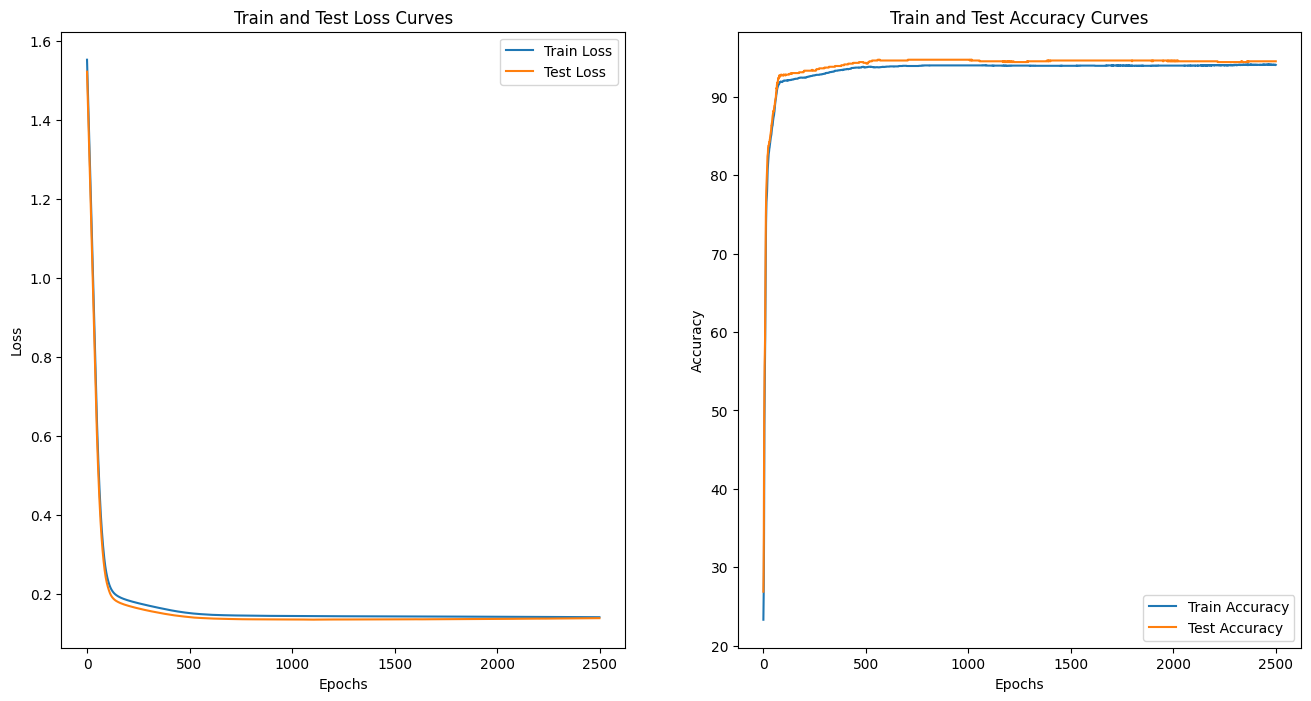

In [19]:
# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=blobs_model.parameters(), lr=0.001)

# Train/Test Loop
torch.manual_seed(42)
epochs = 2500

# Init empty lists to store loss values
train_loss_values = []
test_loss_values = []
train_acc_values = []
test_acc_values = []
epochs_list = []

for epoch in range(epochs):
    # 0. Set model to train mode
    blobs_model.train()

    # 1. Make the forward pass
    y_blob_logits = blobs_model(X_blob_train)
    y_blob_pred = torch.softmax(y_blob_logits, dim=1).argmax(dim=1)

    # 2. Calculate the loss
    loss = loss_fn(y_blob_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_blob_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step step step
    optimizer.step()

    # Test loop
    blobs_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_blob_logits = blobs_model(X_blob_test)
        test_blob_pred = torch.softmax(test_blob_logits, dim=1).argmax(dim=1)

        # 2. Calculate the loss/accuracy
        test_loss = loss_fn(test_blob_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_blob_pred)

        # Every few epochs, print stuff
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}")
    
    # Append loss values to lists
    train_loss_values.append(loss.cpu().item())
    train_acc_values.append(acc)
    test_loss_values.append(test_loss.cpu().item())
    test_acc_values.append(test_acc)
    epochs_list.append(epoch)

# Plot the loss curves
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_list, train_loss_values, label="Train Loss")
plt.plot(epochs_list, test_loss_values, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Test Loss Curves")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs_list, train_acc_values, label="Train Accuracy")
plt.plot(epochs_list, test_acc_values, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracy Curves")
plt.legend()
plt.show()

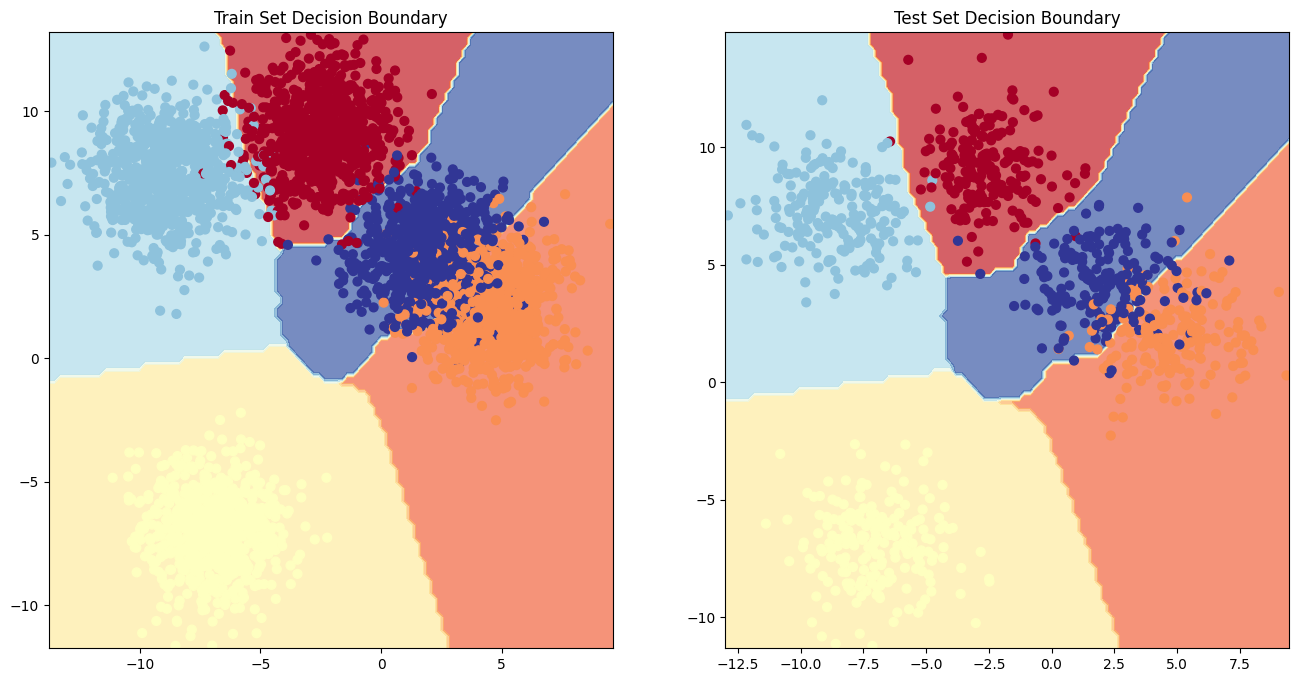

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("Train Set Decision Boundary")
plot_decision_boundary(blobs_model, X_blob_train.cpu(), y_blob_train.cpu())
plt.subplot(1, 2, 2)
plt.title("Test Set Decision Boundary")
plot_decision_boundary(blobs_model, X_blob_test.cpu(), y_blob_test.cpu())
plt.show()